In [1]:
import sys
sys.path.append('..')

In [2]:
import os
import csv

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.dataset import TensorDataset
from torchvision.utils import make_grid
import pandas as pd
from pandas.api.types import CategoricalDtype

from models.numeric import NumericModel
from models.mnist import BaseModel

In [3]:
%load_ext autoreload
%autoreload 2

In [53]:
ATTACKS_MNIST = [
    'apgd_0.3', 'apgd_1.5',
    'apgd2_1.5', 'apgd2_5.0',
    'cw2_0.0', 'cw2_10.0',
    'boundary_0.3',
    'deepfool_1e-06',
    'line_1.0']

def get_adv_files(data, model, attack_names):
    adv_files = ['{}_{}_{}_x.npy'.format(data, model, attack_names[0])]
    for att in attack_names:
        adv_files.append('{}_{}_{}_adv.npy'.format(data, model, att))
    return adv_files


In [54]:
# adv_files = get_adv_files('cifar10', 'resnet', ATTACKS_CIFAR10)
adv_files = get_adv_files('mnist', 'basic', ATTACKS_MNIST)
print(adv_files[:3])

['mnist_basic_apgd_0.3_x.npy', 'mnist_basic_apgd_0.3_adv.npy', 'mnist_basic_apgd_1.5_adv.npy']


In [55]:
y = np.load(os.path.join('..', 'results', 'mnist_basic_apgd_0.063_y.npy'))
indices = np.zeros(10, dtype=int)
for c in range(10):
    i = (np.where(y == c)[0])[0]
    indices[c] = i
print(indices)

[ 3  2  1 18  4  8 11  0 61  7]


In [56]:
def cat_img(tensor, img_path, indices):
    X = np.load(os.path.join('..', 'results', img_path))
    t = torch.cat((tensor, torch.from_numpy(X[indices])))
    return t

In [57]:
X = np.load(os.path.join('..', 'results', 'mnist_basic_apgd_0.063_x.npy'))
tensor_img = torch.from_numpy(X[indices])

for adv in adv_files[1:]:
    print(adv)
    tensor_img = cat_img(tensor_img, adv, indices)

mnist_basic_apgd_0.3_adv.npy
mnist_basic_apgd_1.5_adv.npy
mnist_basic_apgd2_1.5_adv.npy
mnist_basic_apgd2_5.0_adv.npy
mnist_basic_cw2_0.0_adv.npy
mnist_basic_cw2_10.0_adv.npy
mnist_basic_boundary_0.3_adv.npy
mnist_basic_deepfool_1e-06_adv.npy
mnist_basic_line_1.0_adv.npy


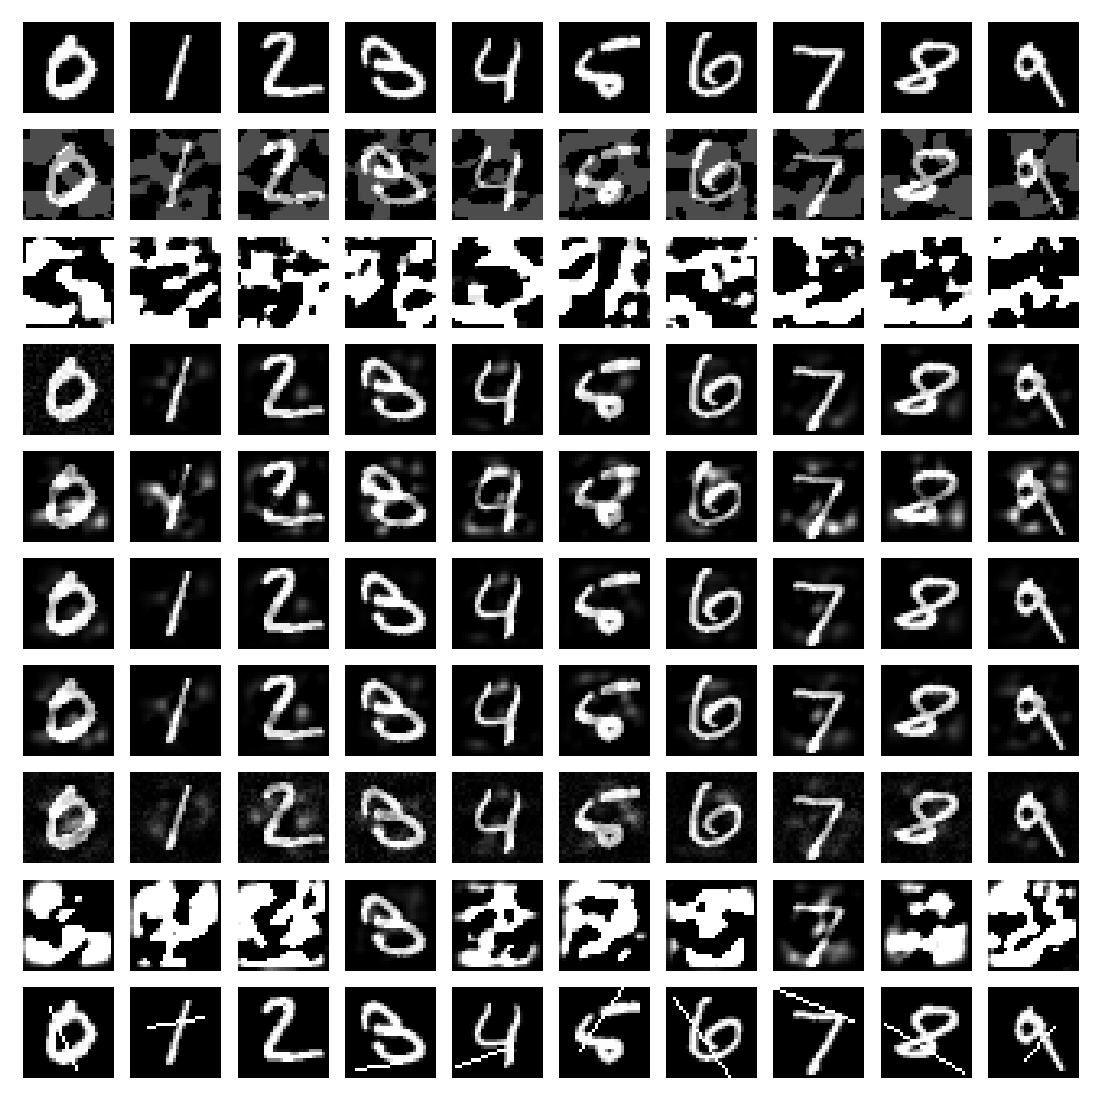

In [64]:
image = make_grid(tensor_img, nrow=10, padding=5, pad_value=1.)
image = image.permute(1, 2, 0).detach().numpy()
plt.figure(figsize=(20, 20))
plt.imshow(image)
plt.axis('off')
plt.savefig('cover_img.svg', format='svg', quality=100, bbox_inches='tight', pad_inches=1.5)